In [6]:
import mysql.connector as mysql
from datetime import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

In [7]:
%%javascript
//toggle scrolling for jupyter notebooks.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
def getSqlConfigFromJSON(configFileName):
    """
    Loads full mysql connect object from database returns the value as a JSON object. Format of the JSON object 
    is the following:
    
        {
            "host": "hostname.com",
            "port": 99999,
            "user": "root",
            "passwd": "passworkd",
            "database": "database_or_schema_name"
        }
        
    """
    
    with open(configFileName) as f:
        mysqlConnectObject = json.load(f)
        
    return mysqlConnectObject

In [9]:
mysqlConnectObject = getSqlConfigFromJSON('./saraSqlConfig.json')
db = mysql.connect(
    host = mysqlConnectObject["DB_HOST"],
    port = mysqlConnectObject["DB_PORT"],
    user = mysqlConnectObject["DB_USER"],
    passwd = mysqlConnectObject["DB_PASSWORD"],
    database = "HarvardDev"
)

In [31]:
def get_mood(username = 'mash_aya', num_days = 30):
    cursor = db.cursor()
    sql_command = "SELECT when_inserted, json_answer FROM HarvardDev.harvardSurvey " 
    sql_command = sql_command + "where user_id=\""+username +"\" and when_inserted > NOW() - INTERVAL " + str(num_days) + " DAY "
    sql_command =  sql_command + " order by survey_completion_time desc;"
    print(sql_command)

    cursor.execute(sql_command)
    returnedData = cursor.fetchall()
    mood1=[]
    mood2=[]
    for row in returnedData:
        date = row[0]
        row_json=json.loads(row[1])
        try:
            # print(row_json['QMood'])
            mood1.append(float(row_json['QMood'].split(":")[0]))
            mood2.append(float(row_json['QMood'].split(":")[1])  + 5)
        except:
            print(str(date) + " no mood")
            
    return mood1,mood2

In [40]:
num_days = 30
username = 'mash_aya'
mood1,mood2 = get_mood(username,num_days)
mood_sum = [x+y for x,y in zip(mood2,mood2)]

# print(mood1)
# print(mood2)

SELECT when_inserted, json_answer FROM HarvardDev.harvardSurvey where user_id="mash_aya" and when_inserted > NOW() - INTERVAL 30 DAY  order by survey_completion_time desc;
2020-10-14 01:44:48 no mood
2020-10-14 01:31:05 no mood
2020-10-14 01:18:55 no mood
2020-10-14 01:03:58 no mood
2020-10-07 01:30:48 no mood
2020-10-07 01:30:47 no mood
2020-10-07 01:30:46 no mood
2020-10-07 01:30:45 no mood
2020-10-07 01:30:43 no mood
2020-10-07 01:30:42 no mood
2020-10-07 01:30:41 no mood
2020-10-07 01:30:40 no mood


In [41]:
#fake data
# mood1 = np.random.uniform(-5,5,7)
# mood2 = np.random.uniform(-10,0,7)
# mood_sum = [x+y for x,y in zip(mood2,mood2)]

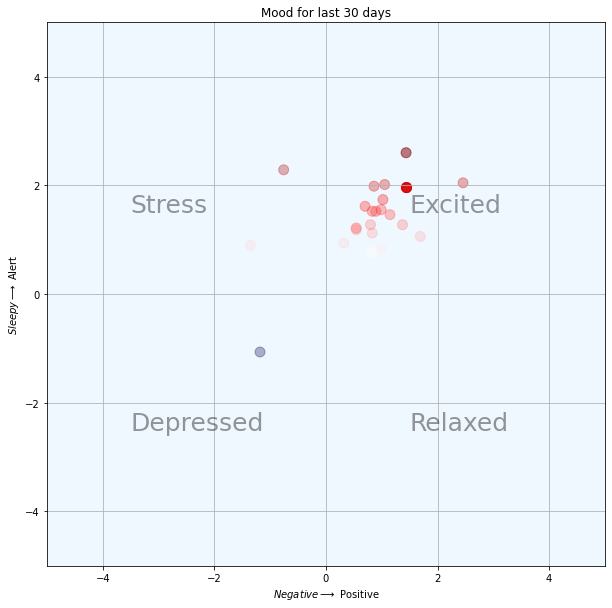

In [43]:
#https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
#https://matplotlib.org/3.1.0/gallery/color/named_colors.html
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(mood1,mood2, alpha=0.3, c=mood_sum,cmap='seismic',s=100)
ax.grid(1)
ax.set_facecolor("aliceblue")
ax.set_title("Mood for last "+str(num_days)+" days")
ax.set_xlabel(r'$Negative \longrightarrow$ Positive')
ax.set_ylabel(r'$Sleepy \longrightarrow$ Alert')
ax.text(-3.5,1.5,"Stress",alpha=0.4,fontsize=25)
ax.text(-3.5,-2.5,"Depressed",alpha=0.4,fontsize=25)
ax.text(1.5,1.5,"Excited",alpha=0.4,fontsize=25)
ax.text(1.5,-2.5,"Relaxed",alpha=0.4,fontsize=25)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
plt.savefig('mood_'+username+'.jpg')